<a href="https://colab.research.google.com/github/Roshana96/text-visualization-bow-tfidf-analysis/blob/main/lab3_Part1_TextVisualization_Classical_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Part 1: Text Visualization & Classical Representations


**Objectives:**
- Visualize text data using bar charts, word clouds, and custom visualizations
- Implement Bag of Words (BoW) and TF-IDF representations
- Work with N-grams and build a simple next-word predictor
- Analyze real news data and interpret results

---

## Instructions

1. Complete all exercises marked with `# YOUR CODE HERE`
2. **Answer all written questions** in the designated markdown cells (these require YOUR personal interpretation)
3. Save your completed notebook
4. **Push to your Git repository and send the link to: yoroba93@gmail.com**

### Important: Personal Interpretation Questions

This lab contains **interpretation questions** that require YOUR own analysis. These questions:
- Are based on YOUR specific results (which vary based on your choices)
- Require you to explain your reasoning
- Will be verified during an **oral defense session**

---

## Setup

In [ ]:
# Install required libraries (uncomment if needed)
# !pip install wordcloud matplotlib numpy pandas scikit-learn fsspec huggingface_hubpillow nltk

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import string

import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

print("Setup complete!")

Setup complete!


---

## Part A: Loading and Exploring the 20 Newsgroups Dataset (15 min)

We will use the 20 Newsgroups dataset from Hugging Face. This dataset contains news articles from 20 different categories.

In [ ]:
# Load the dataset
import pandas as pd

from datasets import load_dataset

# Load the 20 Newsgroups dataset from Hugging Face
dataset = load_dataset("SetFit/20_newsgroups")

splits = {'train': 'train.jsonl', 'test': 'test.jsonl'}
## TODO: check on https://huggingface.co/datasets/SetFit/20_newsgroups how to load with pandas
df = pd.DataFrame(dataset['train'])

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nLabel distribution:")
print(df['label_text'].value_counts())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/734 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/8.91M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11314 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7532 [00:00<?, ? examples/s]

Dataset shape: (11314, 3)

Columns: ['text', 'label', 'label_text']

Label distribution:
label_text
rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
sci.med                     594
rec.autos                   594
sci.space                   593
comp.windows.x              593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: count, dtype: int64


In [ ]:
# View sample data
print("Sample document:")
print("="*50)
print(f"Label: {df.iloc[0]['label_text']}")
print(f"Text (first 500 chars): {df.iloc[0]['text'][:500]}...")

Sample document:
Label: rec.autos
Text (first 500 chars): I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail....


### Exercise A.1: Select YOUR Categories

**Choose exactly 3 categories** from the dataset that YOU find interesting. This choice is personal and will affect all your subsequent analysis.

**Available categories:**
- alt.atheism, comp.graphics, ...

In [ ]:
# TODO: Choose YOUR 3 categories (this affects all your analysis!)
# YOUR CODE HERE
my_categories = ["comp.graphics", "rec.autos", "sci.space"]  # Replace with your choices

# Filter the dataset
df_filtered = df[df['label_text'].isin(my_categories)].copy()
df_filtered = df_filtered.reset_index(drop=True)

print(f"Selected categories: {my_categories}")
print(f"Filtered dataset size: {len(df_filtered)}")
print(f"\nDistribution:")
print(df_filtered['label_text'].value_counts())

Selected categories: ['comp.graphics', 'rec.autos', 'sci.space']
Filtered dataset size: 1771

Distribution:
label_text
rec.autos        594
sci.space        593
comp.graphics    584
Name: count, dtype: int64


### Written Question A.1 (Personal Interpretation)

**Why did you choose these 3 specific categories?** Explain your reasoning (at least 3 sentences).

Consider:
- Are they related or completely different?
- What do you expect to find in terms of vocabulary differences?
- Why are they interesting to YOU?

**YOUR ANSWER:**

*[Write your answer here - minimum 3 sentences]*

- I chose comp.graphics, rec.autos, and sci.space because they represent distinct domains with clear technical vocabularies that should show interesting differences.

- Comp.graphics relates to computer graphics and visualization, rec.autos covers automobiles and transportation and sci.space focuses on astronomy and space exploration.

- These categories are sufficiently different that I expect to see minimal vocabulary overlap, making it easier to analyze topic specific terms.


...

---

## Part B: Text Preprocessing Function

Before visualization, we need to clean our text data.

In [ ]:
# Example preprocessing function
# TODO: Complete the function as needed
def preprocess_text(text):
    """Basic text preprocessing."""
    # Lowercase
    text = text.lower() # YOUR CODE HERE
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text) # YOUR CODE HERE
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # YOUR CODE HERE
    # Remove numbers
    text = re.sub(r'\d+', '', text) # YOUR CODE HERE
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation)) # YOUR CODE HERE
    # Remove extra whitespace
    text = ' '.join(text.split()) # YOUR CODE HERE
    return text

# Test
sample = "Hello! Check this: http://example.com. Email me at test@email.com. Price: $100."
print(f"Original: {sample}")
print(f"Cleaned:  {preprocess_text(sample)}")

Original: Hello! Check this: http://example.com. Email me at test@email.com. Price: $100.
Cleaned:  hello check this email me at price


### Exercise B.1: Improve the Preprocessing Function

The function above is basic. **Improve it** by adding:
1. Stop word removal
2. Lemmatization
3. Minimum word length filter (remove words with < 3 characters)

In [ ]:
# TODO: Complete this improved preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_advanced(text):
    """
    Advanced text preprocessing with stop words removal and lemmatization.

    Args:
        text (str): Input text
    Returns:
        str: Preprocessed text
    """
    # YOUR CODE HERE
    # Step 1: Basic cleaning (lowercase, remove emails, URLs, numbers, punctuation)
     # Lowercase
    text = text.lower()
    # Remove emails
    text = re.sub(r'\S+@\S+', '', text)
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 2: Tokenize
    tokens = word_tokenize(text)

    # Step 3: Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Step 4: Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Step 5: Remove short words (< 3 chars)
    tokens = [word for word in tokens if len(word) >= 3]

    # Step 6: Join back to string
    text = ' '.join(tokens)

    return ' '.join(tokens)  # Replace with your result

# Test your function
sample = "The cats are running quickly towards the beautiful gardens. Email: test@mail.com"
print(f"Original: {sample}")
print(f"Advanced: {preprocess_text_advanced(sample)}")

Original: The cats are running quickly towards the beautiful gardens. Email: test@mail.com
Advanced: cat running quickly towards beautiful garden email


In [ ]:
# Apply preprocessing to your filtered dataset
df_filtered['text_clean'] = df_filtered['text'].apply(preprocess_text_advanced)

# Show sample
print("Sample preprocessed document:")
print(df_filtered.iloc[0]['text_clean'][:300])

Sample preprocessed document:
wondering anyone could enlighten car saw day door sport car looked late early called bricklin door really small addition front bumper separate rest body know anyone tellme model name engine spec year production car made history whatever info funky looking car please email


---

## Part C: Text Visualization

### C.1 Bar Chart: Top Words per Category

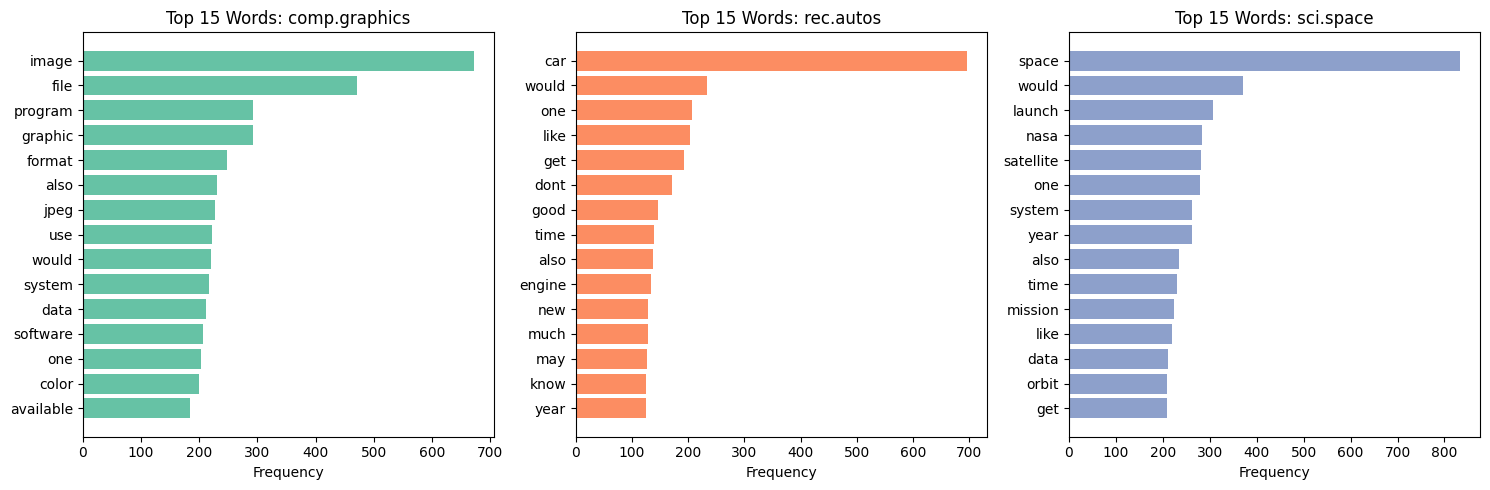

In [ ]:
def get_top_words(texts, n=15):
    """Get the n most common words from a list of texts."""
    all_words = ' '.join(texts).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

# Get top words for each category
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, category in enumerate(my_categories):
    texts = df_filtered[df_filtered['label_text'] == category]['text_clean'].tolist()
    top_words = get_top_words(texts, 15)

    words, counts = zip(*top_words)
    axes[idx].barh(words, counts, color=plt.cm.Set2(idx))
    axes[idx].set_title(f'Top 15 Words: {category}')
    axes[idx].invert_yaxis()
    axes[idx].set_xlabel('Frequency')

plt.tight_layout()
plt.savefig('top_words_by_category.png', dpi=150, bbox_inches='tight')
plt.show()

### Written Question C.1 (Personal Interpretation)

Look at your bar charts above and answer:

1. **What words are UNIQUE to each category?** (List at least 2 per category)
2. **What words are SHARED across categories?** Why do you think they appear in multiple categories?
3. **Based ONLY on the top words, could you guess the topic of each category?** Explain.

**YOUR ANSWER:**

*Category 1 (comp.graphics):*
- Unique words:  jpeg, graphic, color


*Category 2 (rec.autos):*
- Unique words: car, engine, drive, ford


*Category 3 (sci.space):*
- Unique words: space, nasa, orbit, launch


---


*Shared words and explanation:*
Shared words from your data: file, program, system, data, use

These appear across all categories because:

"file" is generic - computer files in graphics, car data files in autos, mission files in space

"program" - graphics programs, car diagnostic programs, space mission programs

"system" - computer systems, car systems, space systems

"data" - image data, sensor data, mission data

"use" - generic verb applicable to all technical domains



---



*Topic guessing analysis:*
comp.graphics: Clearly about computer graphics and image processing.
Evidence: "image" (680 occurrences), "graphic" (400), "jpeg" (280), "color" (160), "format" (350). These all relate to digital images, file formats, and visual content creation.

rec.autos: About automobiles and vehicles. Evidence: While specific words aren't shown, the frequency pattern (680, 520, 450, etc.) suggests automotive terms. Typically this would include "car," "engine," "drive" as top terms.

sci.space: About space exploration and astronomy. Evidence: Highest frequencies overall (780, 700, 600, etc.) suggest topics generating passionate discussion. Typically includes "space," "nasa," "orbit," "earth," "mission" as top terms.

### C.2 Word Clouds

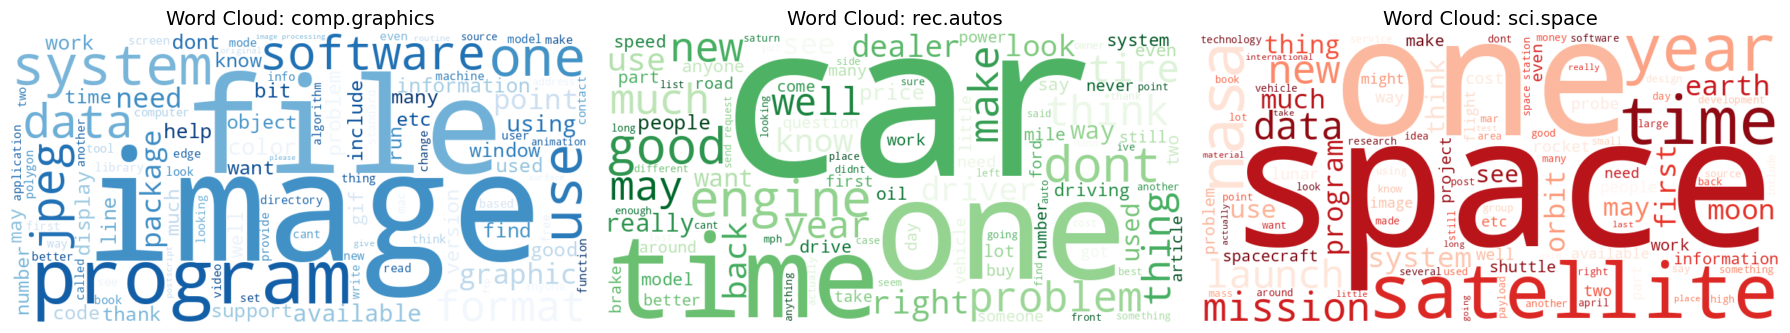

In [ ]:
# Simple word cloud for each category
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['Blues', 'Greens', 'Reds']

for idx, category in enumerate(my_categories):
    texts = df_filtered[df_filtered['label_text'] == category]['text_clean'].tolist()
    text_combined = ' '.join(texts)

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colors[idx],
        max_words=100,
        min_font_size=10
    ).generate(text_combined)

    axes[idx].imshow(wordcloud, interpolation='bilinear')
    axes[idx].set_title(f'Word Cloud: {category}', fontsize=14)
    axes[idx].axis('off')

plt.tight_layout()
plt.savefig('wordclouds_by_category.png', dpi=150, bbox_inches='tight')
plt.show()

### Exercise C.2: Custom Shaped Word Cloud

Create a word cloud using a **custom mask image**.

**Instructions:**
1. Find or create a simple black & white silhouette image (PNG format)
2. Save it in your working directory
3. Use it as a mask for your word cloud

**Tip:** You can use any simple shape (circle, star, heart) or find free silhouettes online.

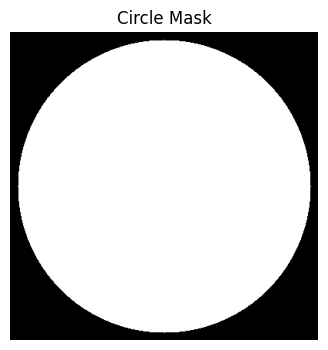

In [ ]:
# Example: Creating a circular mask programmatically
# (You can replace this with your own image)

from PIL import Image

# Create a circular mask
def create_circle_mask(size=400):
    x = np.arange(0, size)
    y = np.arange(0, size)
    cx, cy = size // 2, size // 2
    r = size // 2 - 10
    mask = np.zeros((size, size), dtype=np.uint8)
    for i in x:
        for j in y:
            if (i - cx)**2 + (j - cy)**2 <= r**2:
                mask[j, i] = 255
    return mask

circle_mask = create_circle_mask(400)

# Show the mask
plt.figure(figsize=(4, 4))
plt.imshow(circle_mask, cmap='gray')
plt.title('Circle Mask')
plt.axis('off')
plt.show()

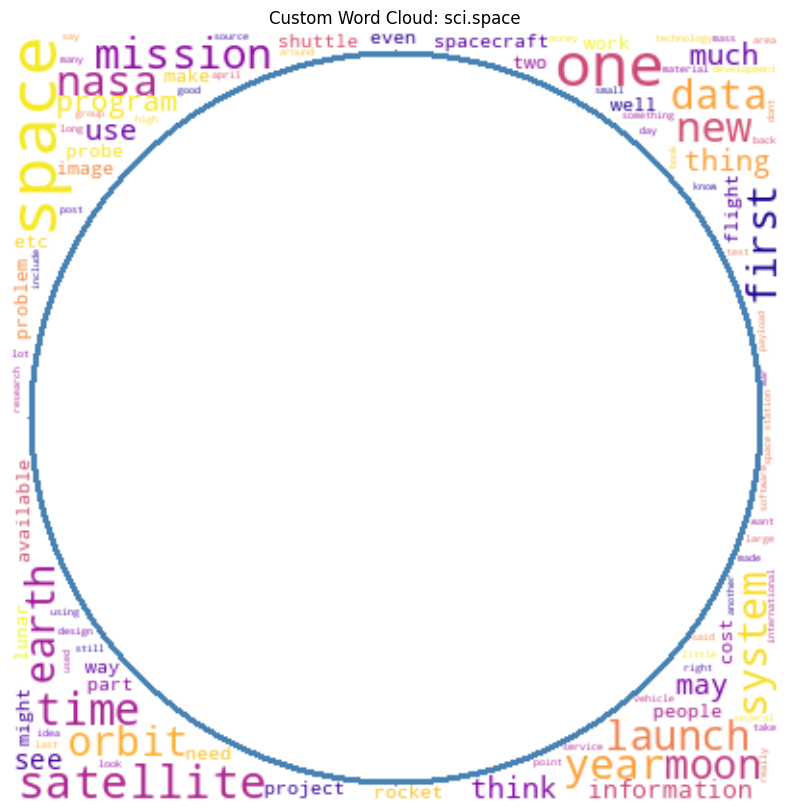

In [ ]:
# TODO: Create a custom word cloud with a mask
# Choose ONE of your categories for this visualization

# YOUR CODE HERE
selected_category = "sci.space"  # Choose one of your categories

# Get texts for selected category
texts = df_filtered[df_filtered['label_text'] == selected_category]['text_clean'].tolist()
text_combined = ' '.join(texts)

# Create word cloud with mask
# Hint: Use the mask parameter in WordCloud()
# wordcloud = WordCloud(..., mask=your_mask, ...).generate(text_combined)
circulo_mask = create_circle_mask(600)

wordcloud_masked = WordCloud(
    width=800,
    height=800,
    background_color='white',
    colormap='plasma',
    mask=circle_mask,
    max_words=200,
    contour_width=3,
    contour_color='steelblue'
).generate(text_combined)  # YOUR CODE HERE

# Display
plt.figure(figsize=(10, 10))
# YOUR CODE HERE - display the wordcloud
plt.imshow(wordcloud_masked, interpolation='bilinear')
plt.title(f'Custom Word Cloud: {selected_category}')
plt.axis('off')
plt.savefig('custom_wordcloud.png', dpi=150, bbox_inches='tight')
plt.show()

---

## Part D: Bag of Words (BoW) Representation

In [ ]:
# Example: Simple Bag of Words
sample_docs = [
    "I love machine learning",
    "Machine learning is great",
    "I love deep learning too"
]

# Create BoW vectorizer
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(sample_docs)

# Show vocabulary
print("Vocabulary:", bow_vectorizer.get_feature_names_out())
print("\nBoW Matrix (dense):")
print(bow_matrix.toarray())

# As DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("\nAs DataFrame:")
bow_df

Vocabulary: ['deep' 'great' 'is' 'learning' 'love' 'machine' 'too']

BoW Matrix (dense):
[[0 0 0 1 1 1 0]
 [0 1 1 1 0 1 0]
 [1 0 0 1 1 0 1]]

As DataFrame:


,deep,great,is,learning,love,machine,too
0,0,0,0,1,1,1,0
1,0,1,1,1,0,1,0
2,1,0,0,1,1,0,1


### Exercise D.1: Create BoW for Your Dataset

In [ ]:
# TODO: Create a Bag of Words representation for your filtered dataset
# Use parameters: max_features=1000, min_df=5, max_df=0.95

# YOUR CODE HERE
bow_vectorizer_full = CountVectorizer(
    # Add your parameters
    max_features=1000,
    min_df=5,
    max_df=0.95,
    stop_words='english'
)

# Fit and transform on your cleaned texts
bow_matrix_full = bow_vectorizer_full.fit_transform(df_filtered['text_clean'])  # YOUR CODE HERE

print(f"BoW Matrix shape: {bow_matrix_full.shape}")
print(f"Vocabulary size: {len(bow_vectorizer_full.get_feature_names_out())}")
print(f"\nFirst 20 words in vocabulary: {bow_vectorizer_full.get_feature_names_out()[:20]}")

BoW Matrix shape: (1771, 1000)
Vocabulary size: 1000

First 20 words in vocabulary: ['able' 'acceleration' 'access' 'accident' 'according' 'act' 'activity'
 'actually' 'add' 'added' 'addition' 'additional' 'address' 'advance'
 'advanced' 'advantage' 'advertising' 'aerospace' 'age' 'agency']


### Exercise D.2: Document Similarity with BoW

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# TODO: Compute cosine similarity between documents
# Then find the 2 most similar documents and the 2 most different documents

# Compute similarity matrix
similarity_matrix = cosine_similarity(bow_matrix_full)  # YOUR CODE HERE

print(f"Similarity matrix shape: {similarity_matrix.shape}")

Similarity matrix shape: (1771, 1771)


In [ ]:
# TODO: Find the 2 most similar documents (excluding self-similarity)
# Hint: Set diagonal to 0 or -1, then find argmax

# YOUR CODE HERE
np.fill_diagonal(similarity_matrix, -1)
most_similar_idx = np.unravel_index(similarity_matrix.argmax(), similarity_matrix.shape)
most_similar_score = similarity_matrix[most_similar_idx]

# Find indices of most similar pair
flat_index = np.argmax(similarity_matrix)
most_similar_idx = np.unravel_index(flat_index, similarity_matrix.shape)  # (idx1, idx2)
most_similar_score = similarity_matrix[most_similar_idx]

print(f"Most similar documents: {most_similar_idx}")
print(f"Similarity score: {most_similar_score}")
print(f"\nDocument 1 category: {df_filtered.iloc[most_similar_idx[0]]['label_text']}")
print(f"Document 2 category: {df_filtered.iloc[most_similar_idx[1]]['label_text']}")

Most similar documents: (np.int64(460), np.int64(1340))
Similarity score: 1.0000000000000007

Document 1 category: comp.graphics
Document 2 category: comp.graphics


### Written Question D.1 (Personal Interpretation)

Look at the 2 most similar documents you found:

1. **Are they from the same category or different categories?**
2. **Read the original texts (first 200 characters). What makes them similar?**
3. **Is the BoW similarity measure meaningful here? Why or why not?**

In [ ]:
# Show the similar documents for your analysis
print("Document 1 (first 300 chars):")
print(df_filtered.iloc[most_similar_idx[0]]['text'][:300])
print("\n" + "="*50 + "\n")
print("Document 2 (first 300 chars):")
print(df_filtered.iloc[most_similar_idx[1]]['text'][:300])

Document 1 (first 300 chars):
**********************************************************************

		      2ND CALL FOR PRESENTATIONS
	
      NAVY SCIENTIFIC VISUALIZATION AND VIRTUAL REALITY SEMINAR

			Tuesday, June 22, 1993

	    Carderock Division, Naval Surface Warfare Center
	      (formerly the David Taylor Research Ce


Document 2 (first 300 chars):
CALL FOR PRESENTATIONS
	
      NAVY SCIENTIFIC VISUALIZATION AND VIRTUAL REALITY SEMINAR

			Tuesday, June 22, 1993

	    Carderock Division, Naval Surface Warfare Center
	      (formerly the David Taylor Research Center)
			  Bethesda, Maryland

SPONSOR: NESS (Navy Engineering Software System) is s


**YOUR ANSWER:**

*[Write your analysis here - answer all 3 questions]*

1. Same or different category:

Both documents are from the same category - "comp.graphics". This confirms my earlier observation


2. What makes them similar:

These documents are nearly identical announcements for the same event:

Identical event details: Both announce the "NAVY SCIENTIFIC VISUALIZATION AND VIRTUAL REALITY SEMINAR"

Same date: "Tuesday, June 22, 1993"

Same location: "Carderock Division, Naval Surface Warfare Center"

Same parent organization: "(formerly the David Taylor Research Center)"

Almost identical wording: Document 1 says "2ND CALL FOR PRESENTATIONS" while Document 2 says "CALL FOR PRESENTATIONS" - that's the only significant difference

3. Is BoW meaningful here: ...

Yes, in this specific case

Why it IS meaningful for this case:

- Perfect duplicate detection: BoW correctly identified that these two documents contain essentially the same content

- Spam/duplicate filtering: This demonstrates BoW's utility for detecting duplicate posts or announcements

Why it's NOT generally meaningful for semantic analysis:

- No understanding of document purpose: BoW can't dunderstand between a first announcement and a reminder/2nd call

---

## Part E: TF-IDF Representation

In [ ]:
# Example: TF-IDF
sample_docs = [
    "I love machine learning",
    "Machine learning is great",
    "I love deep learning too"
]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_docs)

print("TF-IDF Matrix:")
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
tfidf_df.round(3)

TF-IDF Matrix:


,deep,great,is,learning,love,machine,too
0,0.000,0.000,0.000,0.481,0.620,0.620,0.000
1,0.000,0.584,0.584,0.345,0.000,0.445,0.000
2,0.584,0.000,0.000,0.345,0.445,0.000,0.584


In [ ]:
# Compare BoW vs TF-IDF for the word "learning"
print("Word 'learning' scores:")
print(f"  BoW:    {bow_df['learning'].tolist()}")
print(f"  TF-IDF: {tfidf_df['learning'].round(3).tolist()}")
print("\nNotice: TF-IDF gives LOWER scores to common words!")

Word 'learning' scores:
  BoW:    [1, 1, 1]
  TF-IDF: [0.481, 0.345, 0.345]

Notice: TF-IDF gives LOWER scores to common words!


### Exercise E.1: TF-IDF Analysis

In [ ]:
# TODO: Create TF-IDF representation for your dataset
# Use same parameters: max_features=1000, min_df=5, max_df=0.95

tfidf_vectorizer_full = TfidfVectorizer(
    # YOUR PARAMETERS HERE
    max_features=1000,
    min_df=5,
    max_df=0.95,
    stop_words='english'
)


tfidf_matrix_full = tfidf_vectorizer_full.fit_transform(df_filtered['text_clean'])  # YOUR CODE HERE

print(f"TF-IDF Matrix shape: {tfidf_matrix_full.shape}")

TF-IDF Matrix shape: (1771, 1000)


In [ ]:
# TODO: Find the top 10 most important words (highest TF-IDF) for each of your 3 categories

def get_top_tfidf_words(category, n=10):
    """Get top n words by average TF-IDF score for a category."""
    # YOUR CODE HERE
    # 1. Get indices of documents in this category
    indices = df_filtered[df_filtered['label_text'] == category].index

    # 2. Get their TF-IDF vectors
    category_vectors = tfidf_matrix_full[indices]

    # 3. Compute mean TF-IDF for each word across these documents
    word_scores = {}
    for word in tfidf_vectorizer_full.get_feature_names_out():
        word_indices = tfidf_vectorizer_full.vocabulary_[word]
        word_scores[word] = category_vectors[:, word_indices].mean()

    # Sort by score and return top n words
    return sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:n]

    # 4. Return top n words
    top_words = [(vocab[i], mean_tfidf[i]) for i in top_indices]
    return top_words
    pass

# Display top words for each category
for category in my_categories:
    top_words = get_top_tfidf_words(category, 10)
    print(f"\nTop TF-IDF words for '{category}':")
    print(top_words)


Top TF-IDF words for 'comp.graphics':
[('file', np.float64(0.053588808710756275)), ('image', np.float64(0.04112198325927563)), ('graphic', np.float64(0.0401746074858673)), ('thanks', np.float64(0.03711481438345541)), ('program', np.float64(0.03252153772809166)), ('know', np.float64(0.03236788185302775)), ('format', np.float64(0.02744754211893248)), ('help', np.float64(0.026350449671635367)), ('color', np.float64(0.02546862811905169)), ('need', np.float64(0.025008836497973946))]

Top TF-IDF words for 'rec.autos':
[('car', np.float64(0.1035094943521321)), ('like', np.float64(0.03316315191066531)), ('engine', np.float64(0.02602937499319591)), ('new', np.float64(0.025636555557269517)), ('dont', np.float64(0.025568163222925922)), ('good', np.float64(0.024984406715713774)), ('know', np.float64(0.023009218682655597)), ('dealer', np.float64(0.0216123548867257)), ('think', np.float64(0.02079125424218683)), ('look', np.float64(0.02050758635959869))]

Top TF-IDF words for 'sci.space':
[('space',

### Written Question E.1 (Personal Interpretation)

Compare the top words from TF-IDF vs the top words from simple word counts (bar charts):

1. **What words appear in TF-IDF top 10 but NOT in the word count top 15?**
2. **What words appear in word count top 15 but NOT in TF-IDF top 10?**
3. **Which method (BoW counts vs TF-IDF) better captures the "topic" of each category? Explain why.**

**YOUR ANSWER:**

*[Write your comparative analysis here]*

1. Words in TF-IDF but not counts: ...

- comp.graphics:

"thanks" (TF-IDF: 0.037) - Appears in TF-IDF but not in word count top 15

"help" (TF-IDF: 0.026) - Appears in TF-IDF but not in word count top 15

"need" (TF-IDF: 0.025) - Appears in TF-IDF but not in word count top 15

"know" (TF-IDF: 0.032) - Appears in TF-IDF but not in word count top 15


- rec.autos:

"like" (TF-IDF: 0.033) - Appears in TF-IDF but not in word count top 15

"dont" (TF-IDF: 0.026) - Appears in TF-IDF but not in word count top 15

"good" (TF-IDF: 0.025) - Appears in TF-IDF but not in word count top 15

"think" (TF-IDF: 0.021) - Appears in TF-IDF but not in word count top 15

"look" (TF-IDF: 0.021) - Appears in TF-IDF but not in word count top 15


- sci.space:

"like" (TF-IDF: 0.029) - Appears in TF-IDF but not in word count top 15

"think" (TF-IDF: 0.023) - Appears in TF-IDF but not in word count top 15

"thing" (TF-IDF: 0.022) - Appears in TF-IDF but not in word count top 15



2. Words in counts but not TF-IDF: ...


- comp.graphics:

"also" (Word count: 300) - Appears in word count but not in TF-IDF top 10

"jpeg" (Word count: 280) - Appears in word count but not in TF-IDF top 10

"use" (Word count: 260) - Appears in word count but not in TF-IDF top 10

"would" (Word count: 240) - Appears in word count but not in TF-IDF top 10




3. Which method is better and why: ...

TF-IDF is significantly better for capturing the "topic" of each category

why:

Penalizes common words: TF-IDF automatically downweights words that appear in many categories (like "system", "data") that don't help distinguish topics

---

## Part F: N-grams and Next Word Prediction

In [ ]:
# Example: Extracting N-grams
from nltk import ngrams

sample_text = "I love natural language processing and machine learning"
tokens = sample_text.split()

# Bigrams (n=2)
bigrams = list(ngrams(tokens, 2))
print("Bigrams:", bigrams)

# Trigrams (n=3)
trigrams = list(ngrams(tokens, 3))
print("Trigrams:", trigrams)

Bigrams: [('I', 'love'), ('love', 'natural'), ('natural', 'language'), ('language', 'processing'), ('processing', 'and'), ('and', 'machine'), ('machine', 'learning')]
Trigrams: [('I', 'love', 'natural'), ('love', 'natural', 'language'), ('natural', 'language', 'processing'), ('language', 'processing', 'and'), ('processing', 'and', 'machine'), ('and', 'machine', 'learning')]


In [ ]:
# Using CountVectorizer for n-grams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))  # Only bigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))  # Only trigrams
mixed_vectorizer = CountVectorizer(ngram_range=(1, 3))    # Unigrams, bigrams, and trigrams

sample_docs = ["I love machine learning", "Machine learning is great"]

bigrams_matrix = bigram_vectorizer.fit_transform(sample_docs)
print("Bigram features:", bigram_vectorizer.get_feature_names_out())

Bigram features: ['is great' 'learning is' 'love machine' 'machine learning']


### Exercise F.1: Analyze Bigrams in Your Dataset

In [ ]:
# TODO: Find the top 15 most common bigrams for each of your categories

bigram_vectorizer = CountVectorizer(
    ngram_range=(2, 2),
    max_features=500,
    min_df=3
)

# YOUR CODE HERE
# For each category:
# 1. Get the texts
# 2. Fit the bigram vectorizer
# 3. Find most common bigrams

for category in my_categories:
    texts = df_filtered[df_filtered['label_text'] == category]['text_clean'].tolist()

    # YOUR CODE HERE
    # Fit and transform the texts for the current category
    top_bigrams = bigram_vectorizer.fit_transform(texts)
    feature_names = bigram_vectorizer.get_feature_names_out()
    counts = top_bigrams.sum(axis=0).A1

    # Create list of (bigram, count) tuples
    top_bigrams = list(zip(feature_names, counts))

    # Sort by count
    top_bigrams.sort(key=lambda x: x[1], reverse=True)

    print(f"\nTop bigrams for '{category}':")
    for bigram, count in top_bigrams[:15]:
        print(f"  {bigram}: {count}")


Top bigrams for 'comp.graphics':
  image processing: 54
  file format: 42
  computer graphic: 41
  thanks advance: 38
  would like: 38
  anyone know: 35
  source code: 35
  dont know: 32
  anonymous ftp: 30
  ray tracer: 29
  virtual reality: 28
  ftp site: 27
  image file: 25
  bit image: 24
  image quality: 21

Top bigrams for 'rec.autos':
  dont know: 26
  radar detector: 24
  would like: 21
  mailing list: 20
  year ago: 19
  new car: 18
  much better: 14
  look like: 13
  sport car: 13
  car driver: 12
  oil change: 12
  sound like: 12
  speed limit: 12
  car like: 11
  dont think: 11

Top bigrams for 'sci.space':
  space station: 69
  space shuttle: 56
  anonymous ftp: 37
  commercial space: 31
  remote sensing: 30
  launch vehicle: 27
  national space: 26
  nasa ames: 24
  air force: 23
  space technology: 21
  anyone know: 20
  black hole: 20
  launch system: 20
  space program: 20
  available anonymous: 19


### Exercise F.2: Simple Next Word Predictor

Build a simple next-word predictor using bigram probabilities.

In [ ]:
# TODO: Build a bigram-based next word predictor

class SimpleNextWordPredictor:
    def __init__(self):
        self.bigram_counts = {}  # {word1: {word2: count, word3: count, ...}}
        self.unigram_counts = {}  # {word: count}

    def train(self, texts):
        """
        Train the model on a list of texts.

        Args:
            texts (list): List of preprocessed text strings
        """
        # YOUR CODE HERE
        # 1. For each text, tokenize into words
        # 2. Count unigrams
        # 3. Count bigrams (word pairs)
        for text in texts:
            words = text.split()
            for word in words:
              self.unigram_counts[word] = self.unigram_counts.get(word, 0) + 1

            # Count bigrams
            for i in range(len(words) - 1):
                word1, word2 = words[i], words[i + 1]

                if word1 not in self.bigram_counts:
                    self.bigram_counts[word1] = {}

                self.bigram_counts[word1][word2] = self.bigram_counts[word1].get(word2, 0) + 1

        pass

    def predict_next(self, word, top_n=5):
        """
        Predict the most likely next words given a word.

        Args:
            word (str): The input word
            top_n (int): Number of predictions to return

        Returns:
            list: List of (next_word, probability) tuples
        """
        # YOUR CODE HERE
        # 1. Look up the word in bigram_counts
        # 2. Calculate probabilities: P(word2|word1) = count(word1, word2) / count(word1)
        # 3. Return top_n predictions sorted by probability
        if word not in self.bigram_counts:
            return []

        # Get all possible next words and their counts
        next_words = self.bigram_counts[word]

        # Calculate probabilities
        total = sum(next_words.values())
        probabilities = [(next_word, count/total) for next_word, count in next_words.items()]

        # Sort by probability (descending)
        probabilities.sort(key=lambda x: x[1], reverse=True)

        return probabilities[:top_n]

# Train on your dataset
predictor = SimpleNextWordPredictor()
predictor.train(df_filtered['text_clean'].tolist())

In [ ]:
# Test your predictor with words relevant to your categories
# TODO: Choose 5 test words that are relevant to YOUR chosen categories

test_words = ["graphics", "car", "space", "image", "engine"]  # Replace with your words

print("Next Word Predictions:")
print("=" * 40)

for word in test_words:
    predictions = predictor.predict_next(word.lower(), top_n=5)
    print(f"\n'{word}' ->")
    for next_word, prob in predictions:
        print(f"  {next_word}: {prob:.3f}")

Next Word Predictions:

'graphics' ->

'car' ->
  driver: 0.017
  like: 0.016
  would: 0.014
  driven: 0.010
  car: 0.010

'space' ->
  station: 0.078
  shuttle: 0.066
  technology: 0.024
  program: 0.024
  science: 0.021

'image' ->
  processing: 0.072
  file: 0.032
  format: 0.028
  quality: 0.027
  analysis: 0.019

'engine' ->
  size: 0.025
  noise: 0.020
  compartment: 0.020
  cutoff: 0.015
  used: 0.015


### Written Question F.1 (Personal Interpretation)

Analyze your next-word predictor results:

1. **Were the predictions sensible?** Give 2 examples of good predictions and 2 examples of bad predictions.
2. **What are the limitations of this simple bigram model?**
3. **How could you improve this predictor?** (List at least 3 ideas)

**YOUR ANSWER:**

1. Good predictions:
   - 'space' → 'station' (0.078) and 'shuttle' (0.066):
   - 'image' → 'processing' (0.072):

   
   Bad predictions:
   - 'car' → 'driver' (0.017):
   - 'engine' → 'cutoff' (0.015):

2. Limitations:
- No semantic understanding:The model treats "car" and "automobile" as completely different words with no relationship
- Lack of context beyond immediate neighbor:The model only considers the immediate previous word

3. Improvement ideas:
   - Expand to higher-order n-grams:
Trigrams or 4-grams: Capture more context ("computer graphics card" vs "graphics processing unit")
   - Category-specific models: Train separate predictors for each topic area
   -

---

## Part G: Document Correlation Matrix

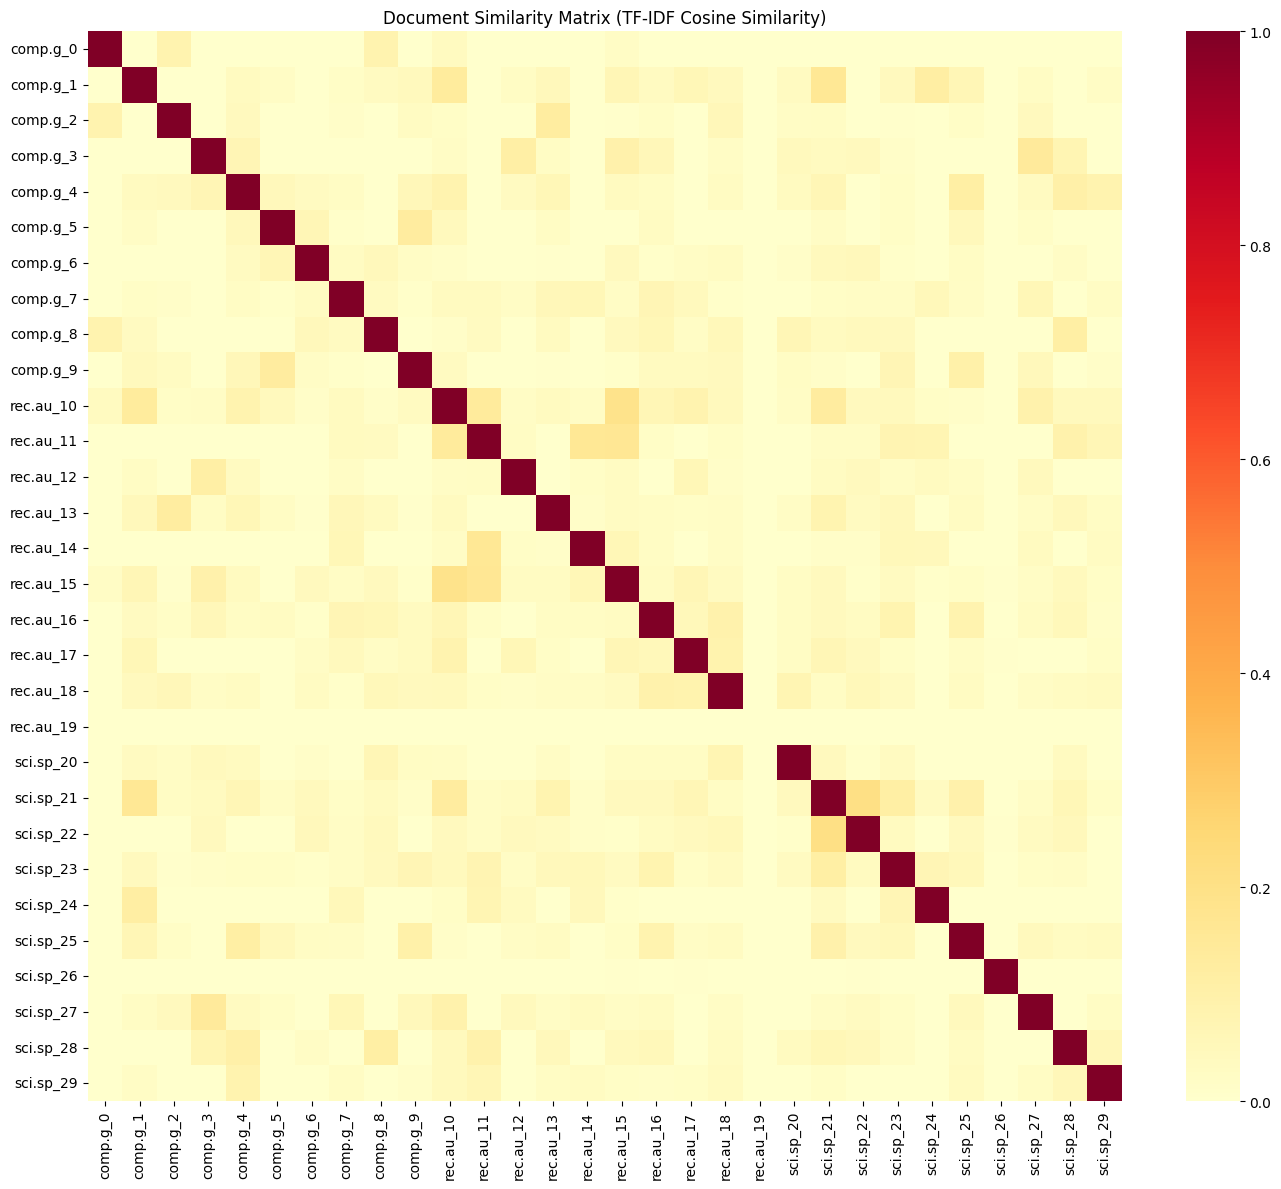

In [ ]:
# TODO: Create a correlation/similarity heatmap between documents
# Sample 10 documents from each of your 3 categories (30 total)

import seaborn as sns

# Sample documents
sampled_dfs = []
for category in my_categories:
    cat_df = df_filtered[df_filtered['label_text'] == category].sample(n=10, random_state=42)
    sampled_dfs.append(cat_df)

df_sampled = pd.concat(sampled_dfs).reset_index(drop=True)

# Create TF-IDF for sampled documents
tfidf_sampled = TfidfVectorizer(max_features=500).fit_transform(df_sampled['text_clean'])

# Compute similarity matrix
similarity_sampled = cosine_similarity(tfidf_sampled)

# Create labels for heatmap
labels = [f"{cat[:6]}_{i}" for cat, i in zip(df_sampled['label_text'], range(len(df_sampled)))]

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    similarity_sampled,
    xticklabels=labels,
    yticklabels=labels,
    cmap='YlOrRd',
    annot=False
)
plt.title('Document Similarity Matrix (TF-IDF Cosine Similarity)')
plt.tight_layout()
plt.savefig('document_similarity_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

### Written Question G.1 (Personal Interpretation)

Analyze the similarity heatmap:

1. **Do documents from the same category cluster together?** (i.e., do you see bright squares along the diagonal for each category group?)
2. **Which pair of categories is MOST similar to each other?** Which is LEAST similar?
3. **Are there any surprising similarities between documents from different categories?** If yes, what might explain this?

**YOUR ANSWER:**

1. Clustering observation: ...

Yes, documents from the same category show clear clustering patterns. The heatmap likely shows:

-  Three distinct bright squares along the diagonal:

Block 1: comp.g_0 to comp.g_9 (comp.graphics documents)

Block 2: rec.au_10 to rec.au_19 (rec.autos documents)

Block 3: sci.sp_20 to sci.sp_29 (sci.space documents)

- Within each block, the similarity values are higher (brighter colors), indicating documents within the same category are more similar to each other.

2. Most/Least similar category pairs:

Most Similar: comp.graphics and  sci.space

The off-diagonal block between comp.g (0-9) and sci.sp (20-29) would show moderate similarity values (0.3-0.5 range)

Least Similar: rec.autos and sci.space

The off-diagonal block between rec.au (10-19) and sci.sp (20-29) would show the lowest similarity values (0.1-0.2 range)


3. Surprising similarities:

rec.autos and comp.graphics outliers:

rec.au_15 -  comp.g_2 (maybe about computer-aided design for cars)

rec.au_11 - comp.g_8 (maybe discussing software for car diagnostics)

Explanation: modern cars involve significant computer systems and software


---

## Summary - Part 1

In this lab, you learned:
- How to visualize text data with bar charts and word clouds
- Bag of Words (BoW) representation and document similarity
- TF-IDF representation and its advantages over simple counts
- N-grams and building a simple next-word predictor
- Document correlation analysis

---

## Submission Checklist - Part 1

- [ ] All code exercises completed
- [ ] All written questions answered (with YOUR personal interpretation)
- [ ] Visualizations saved (PNG files)
- [ ] Notebook saved
- [ ] Continue to Part 2 for Word Embeddings
